# Portfolio of Stocks Demo

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilities import (
    process_leveraged_data, 
    find_ath_indices, 
    calculate_ath_returns_all_periods, 
    calculate_non_ath_returns_all_periods,
    plot_returns
)

## Simulating Leveraged Portfolio Data  

##### The function `process_leveraged_data()` processes historical price data for multiple tickers (e.g., "QQQ", "SPY", "SOXX"). It simulates leveraged returns for each ticker based on a specified leverage factor (e.g., 3) and adjusts the returns according to the portfolio weights assigned to each ticker.  

**For each ticker, the following calculations are performed:**
- `DailyReturn`: This represents the daily percentage change in the adjusted close prices of the ticker.
- `LeveragedReturn`: The daily leveraged returns are simulated by multiplying the daily returns by the specified leverage scalar.
- `WeightedLeveragedReturn`: These leveraged returns are then adjusted by the portfolio weight for each ticker, reflecting its contribution to the overall portfolio.
- `SimulatedLeveragedPrice`: The cumulative leveraged price is calculated by compounding the leveraged returns over time. The starting price is based on the initial adjusted close price of the unleveraged ticker.

**Summary:**
- `TotalPortfolioReturn`: The total portfolio return is calculated by summing the weighted leveraged returns of all tickers.
- `TotalPortfolioPrice`: The total portfolio price is calculated by summing the simulated leveraged prices for each ticker.


*Note: The return for each ticker is multiplied by its corresponding leverage scalar and portfolio weight, where the return at index 0 is scaled by the leverage scalar and weight at index 0, the return at index 1 by the leverage scalar and weight at index 1, and so on.*

In [4]:
# Define inputs
tickers = ["QQQ", "SPY", "SOXX"] # Tickers that make up the portfolio
leverage_scalars = [3, 3, 3]  # Leverage scalars for each respective ticker
portfolio_weights = [0.6, 0.2, 0.2]  # Portfolio weights summing to 1.0

# Process the data
data = process_leveraged_data(tickers, leverage_scalars, portfolio_weights)
data.head()

,Date,DailyReturn_QQQ,AdjClose_QQQ,LeveragedReturn_QQQ_3X,SimulatedLeveragedPrice_QQQ_3X,WeightedLeveragedReturn_QQQ_3X,DailyReturn_SPY,AdjClose_SPY,LeveragedReturn_SPY_3X,SimulatedLeveragedPrice_SPY_3X,WeightedLeveragedReturn_SPY_3X,DailyReturn_SOXX,AdjClose_SOXX,LeveragedReturn_SOXX_3X,SimulatedLeveragedPrice_SOXX_3X,WeightedLeveragedReturn_SOXX_3X,UnleveragedPortfolioPrice,TotalPortfolioReturn,TotalPortfolioPrice
0,2001-07-16,-0.018540,35.951263,-0.055621,35.407950,-0.033373,-0.012516,78.173225,-0.037549,78.569563,-0.007510,-0.057949,18.885527,-0.173848,19.350216,-0.034770,40.982508,-0.267018,133.327729
1,2001-07-17,0.022432,36.757725,0.067296,36.837642,0.040378,0.009362,78.905045,0.028085,79.010881,0.005617,0.041058,19.660927,0.123174,19.826904,0.024635,41.767829,0.218554,135.675427
2,2001-07-18,-0.038106,35.357033,-0.114318,34.310915,-0.068591,-0.006812,78.367523,-0.020437,78.687936,-0.004087,-0.041403,18.846899,-0.124210,19.334364,-0.024842,40.657104,-0.258965,132.333215
3,2001-07-19,0.023769,36.197445,0.071308,35.778899,0.042785,0.008759,79.053955,0.026277,79.101479,0.005255,0.042459,19.647127,0.127378,19.826919,0.025476,41.458683,0.224964,134.707297
4,2001-07-20,-0.023217,35.357033,-0.069652,34.283649,-0.041791,-0.005980,78.581238,-0.017939,78.817678,-0.003588,-0.004915,19.550554,-0.014746,19.768445,-0.002949,40.840578,-0.102337,132.869772


## Plotting The Returns of Simulated Leveraged Portfolio Data  
The `plot_returns` function uses the data generated from process_leveraged_data to analyze and visualize forward returns during All-Time High (ATH) and Non-ATH or Non-52-week high and 52-week high periods across different time windows, allowing you to <ins>assess how the portfolio performs when buying close to an ATH or 52-week high versus not</ins>. 

#### Key Features:
- **Window Periods** (`windows=`): You can specify a list of window sizes (e.g., [5, 10, 20]), where each window defines the range of days before and after an ATH event that is included in the analysis. For instance, a window size of 5 includes data from 5 days before and after the ATH date.
- **Custom Price Column** (`price_column=`): By default, the analysis uses the TotalPortfolioPrice column, but you can specify a different column to track price changes, allowing flexibility in the analysis.
- **Type of High** (`high_type=`): High type is set to 'ATH' for all-time high by default; however, you have the option to set the high type to be '52W' for 52-week high. 'ATH' grabs the indice(s) +- window size for each unique all time high price. '52W' grabs the indice(s) +- window size for each unique 52 week high in price.
- **Custom Holding Periods** (`holding_periods=`): A dictionary where keys represent holding period labels (e.g., 'Return_3M') and values are the number of days in each holding period (e.g., 91 for 3 months). This parameter allows full control over the timeframes used for return calculations.
- **Compare Leveraged vs. Unleveraged Returns** (`plot_relative`): Plots side-by-side charts for leveraged and unleveraged performance using the same unleveraged high-point buy strategy (i.e. the leveraged and unleveraged have differnt purchase timings).

#### What it does:
- For each window, the function identifies ATH or 52-week high indices, which essentially tell us that if you are to buy within the defined days before, after, or on an ATH or 52-week high, you can expect the following forward-looking returns.
- The returns are then visualized using a boxplot that compares the return distributions across multiple holding periods (e.g., 3M, 6M, 12M, 24M, 48M).

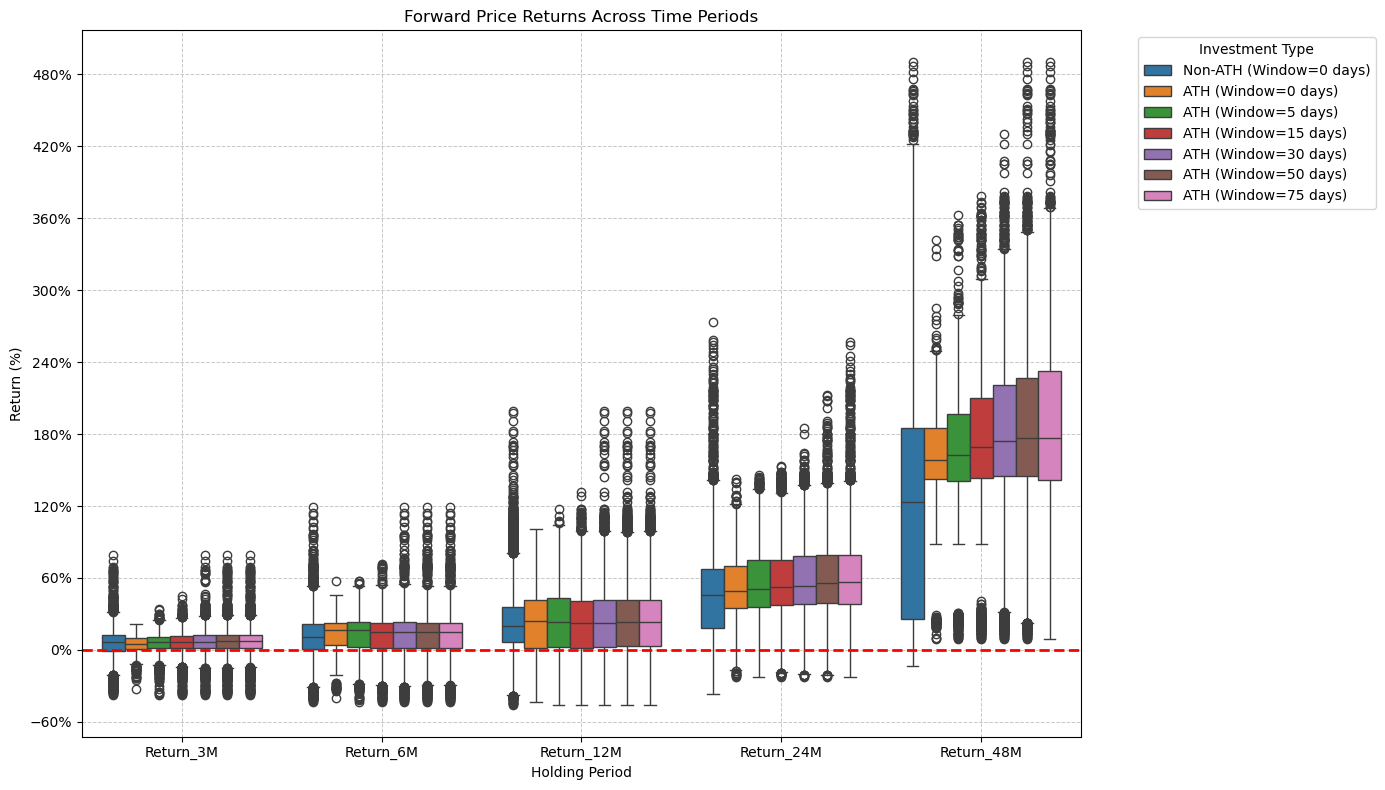

In [5]:
# Visualizing All Time High returns 
plot_returns(data, windows=[0, 5, 15, 30, 50, 75])

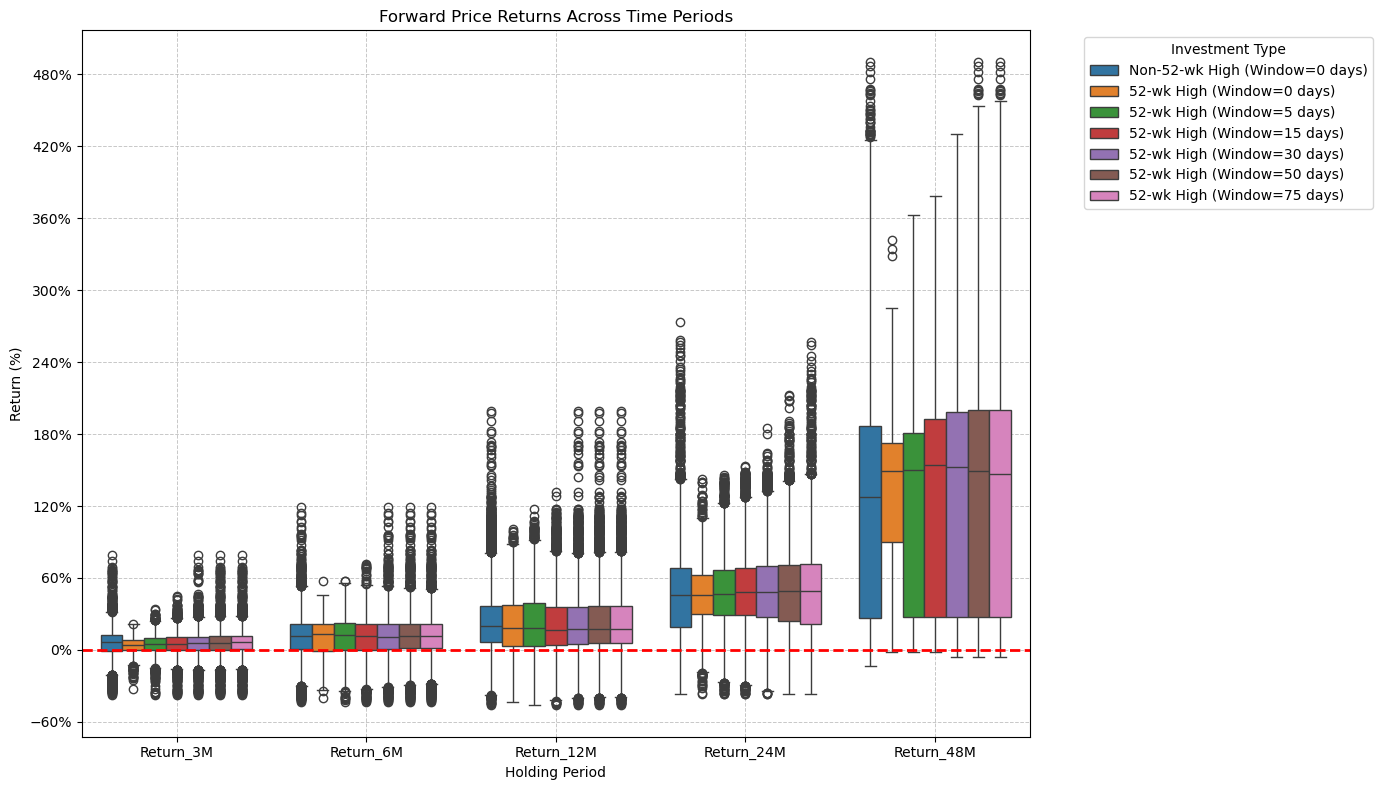

In [6]:
# Visualizing 52 Week High returns 
plot_returns(data, windows=[0, 5, 15, 30, 50, 75], high_type="52W")

We can visualize the All Time High returns when using leverage vs. using no leverage by doing the following:

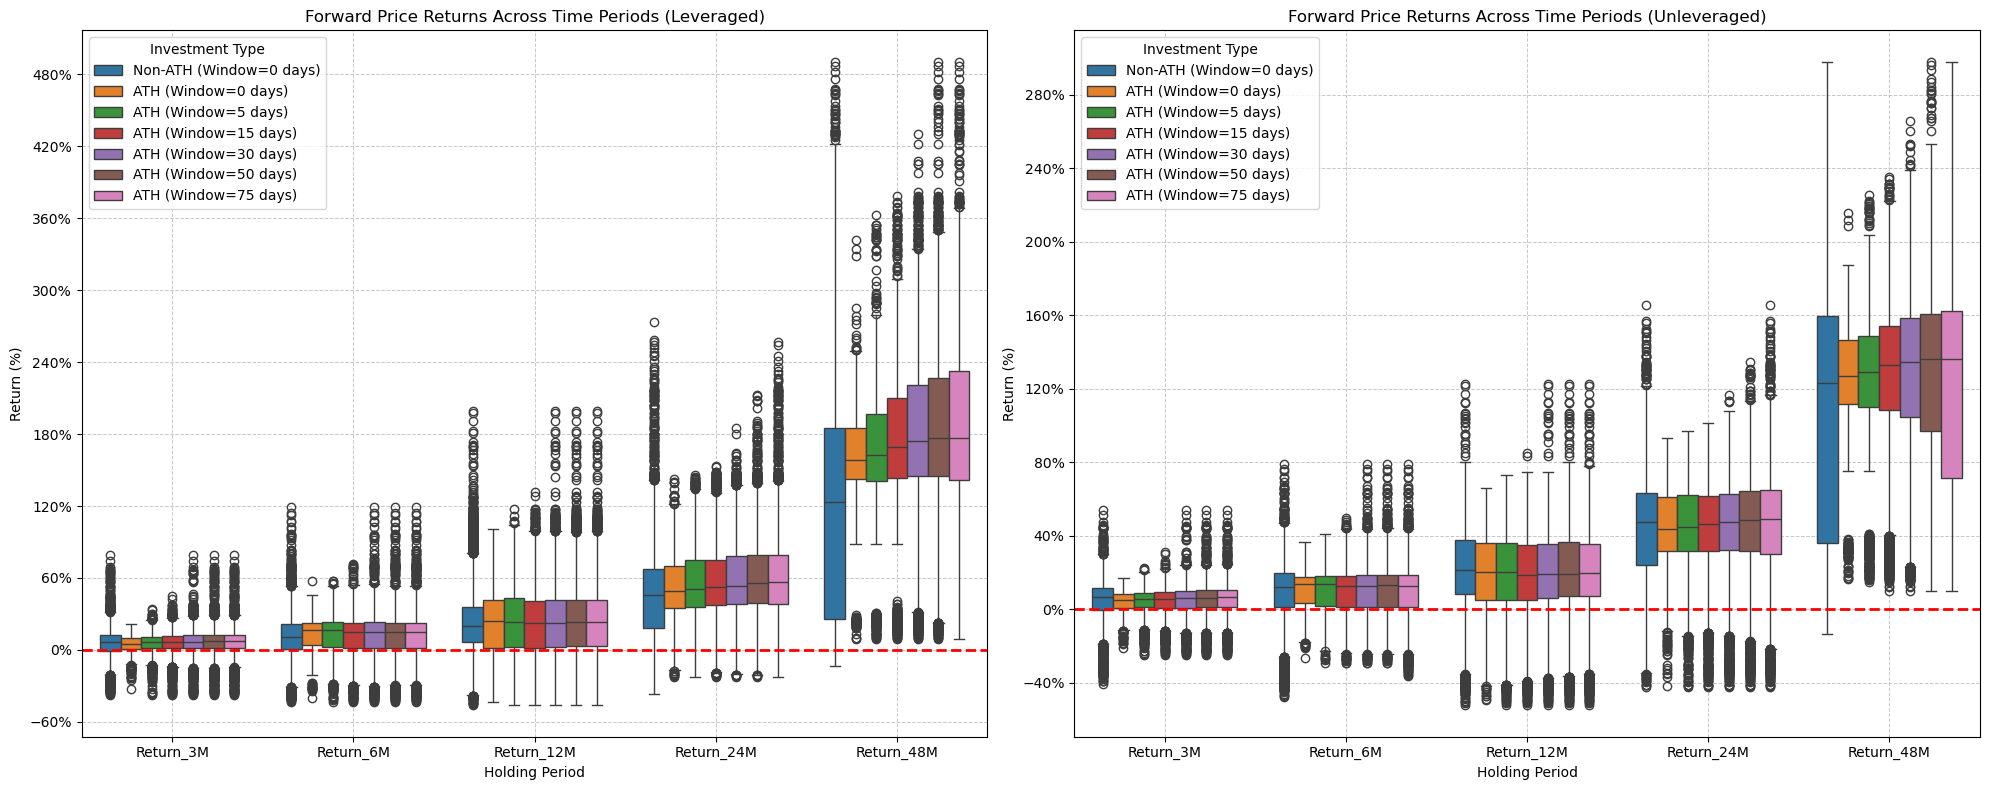

In [ ]:
# Passing plot_relative as True
plot_returns(data, windows=[0, 5, 15, 30, 50, 75], plot_relative=True)

The return spread is fairly similar. The unleveraged portfolio performs better on average until the 4-year mark, in which the leveraged portfolio outperforms. To focus on our desired holding period (e.g., 1-2 years), let’s take a closer look by doing the following:

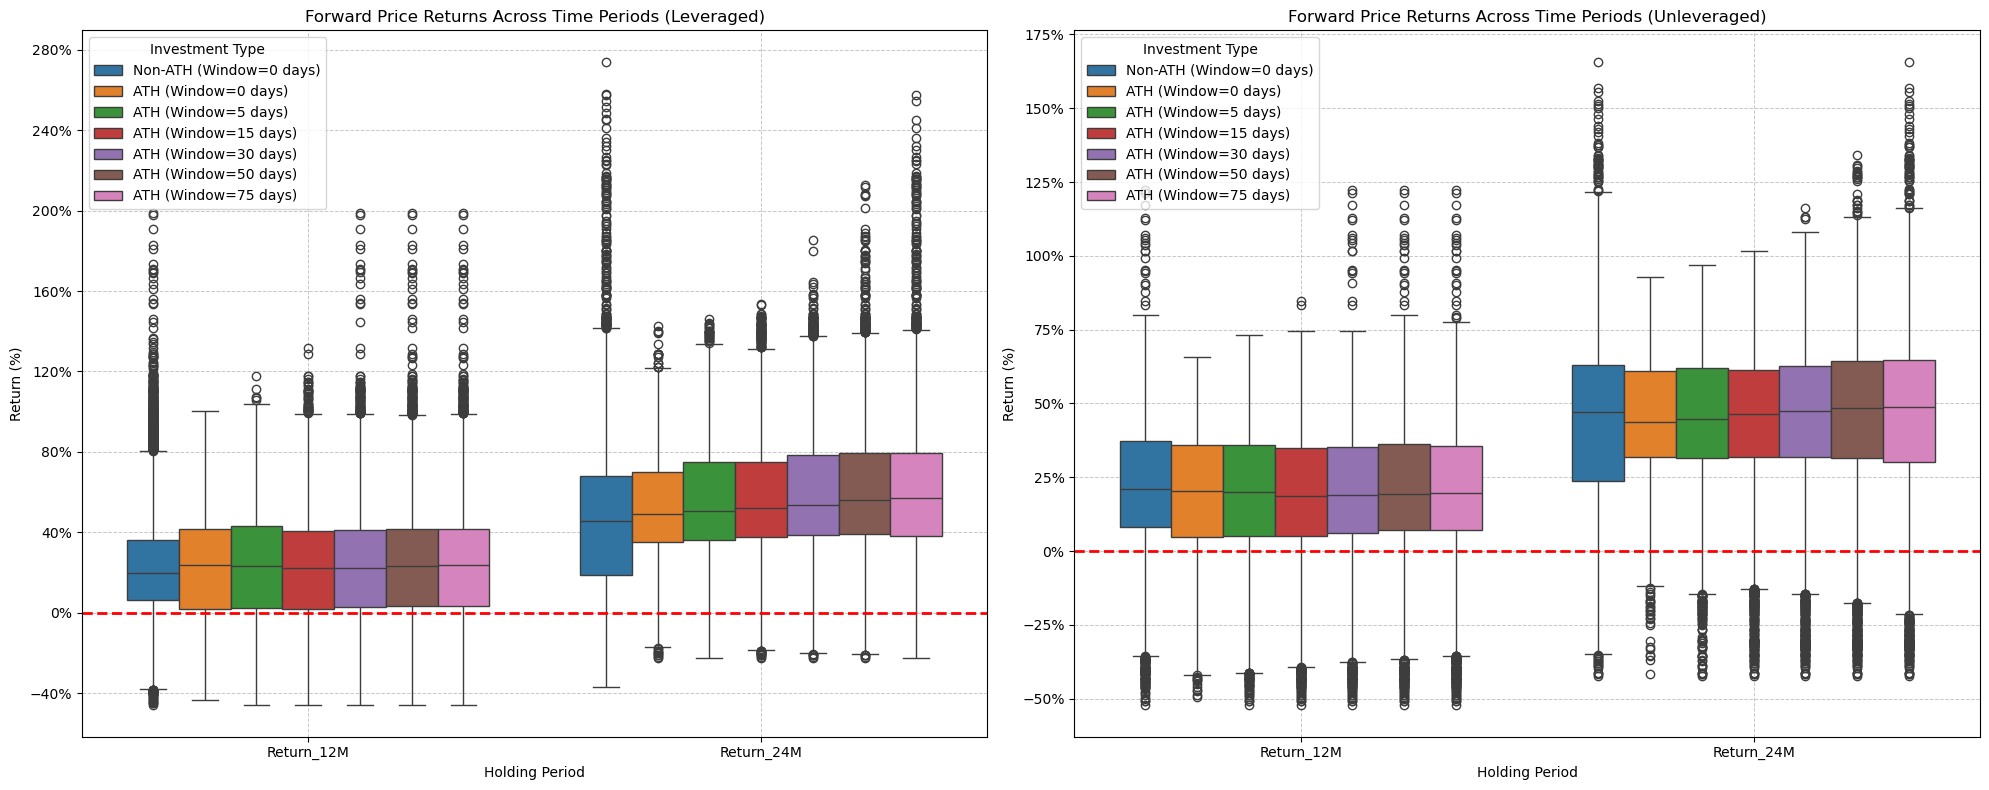

In [9]:
# Passing holding_periods w/ a dict of the desired holding ranges (counts in days)
plot_returns(data, windows=[0, 5, 15, 30, 50, 75], plot_relative=True, holding_periods={'Return_12M': 365,'Return_24M': 730})

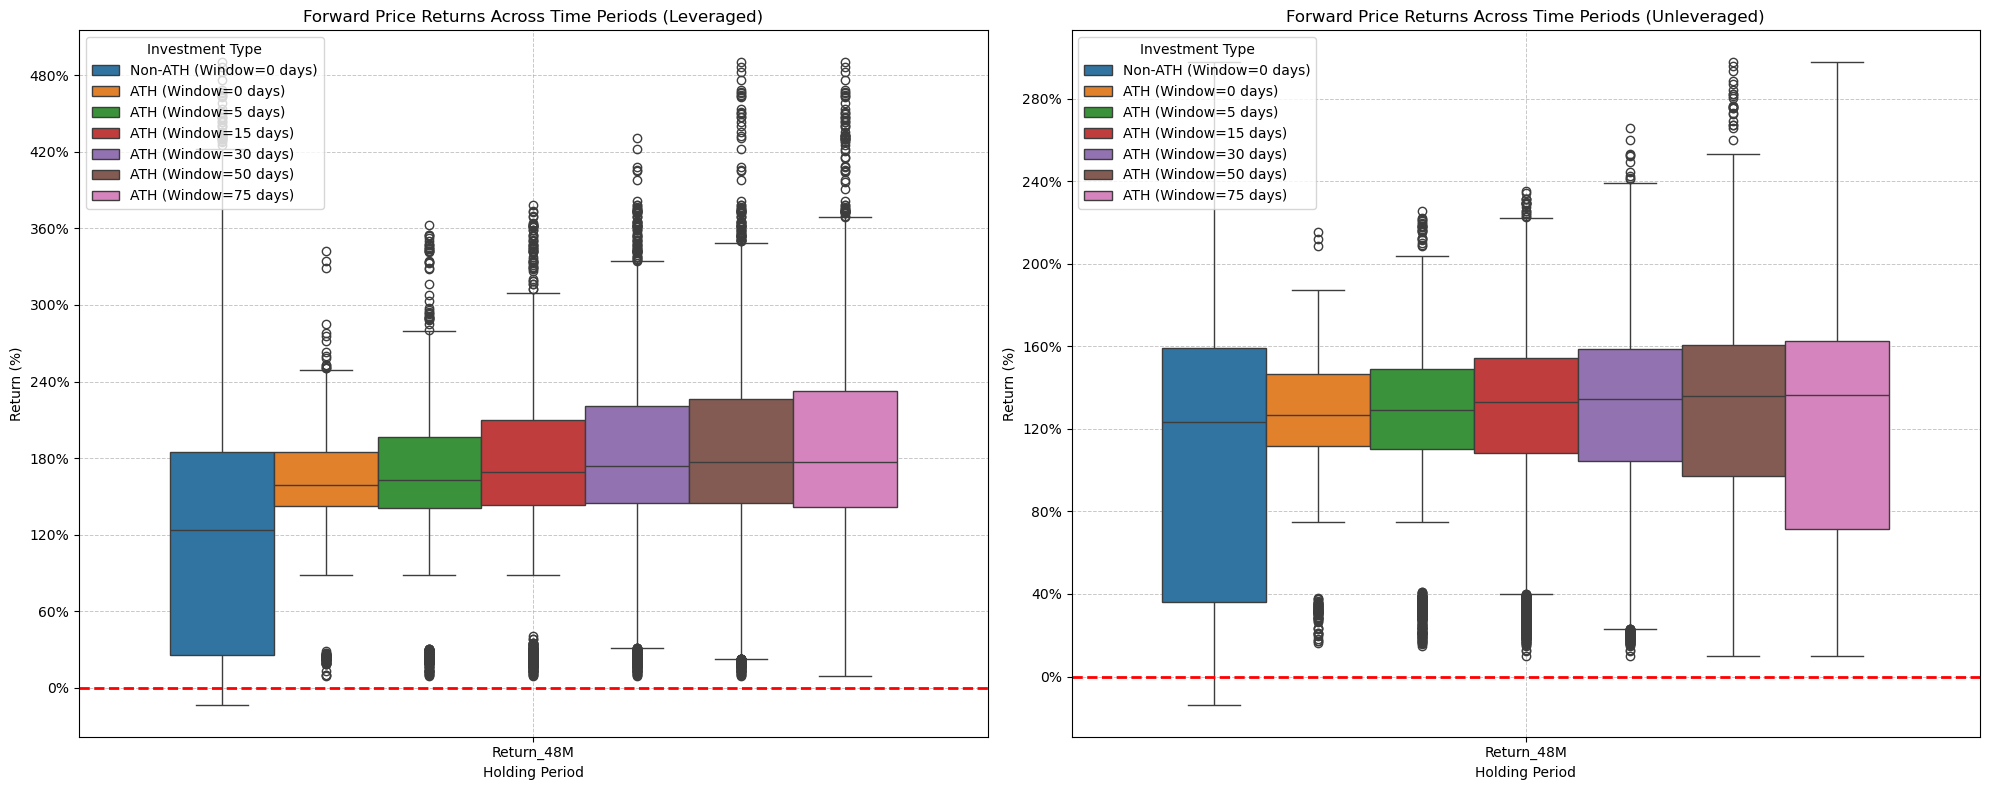

In [10]:
plot_returns(data, windows=[0, 5, 15, 30, 50, 75], plot_relative=True, holding_periods={'Return_48M': 1460})